<a href="https://colab.research.google.com/github/CLAUDERNORONHA/PROJETO-MachineLearning/blob/main/KNN_Segmenta%C3%A7%C3%A3o_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [ ]:

#Dados de clientes de shoppping

df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Exploração de Dados

In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


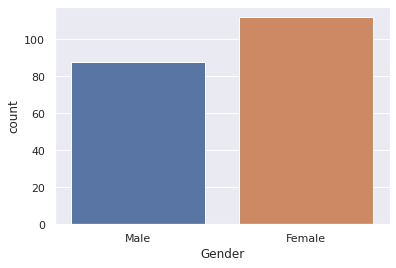

In [ ]:
df['Gender'].value_counts()

#plot
sns.countplot(df['Gender']);

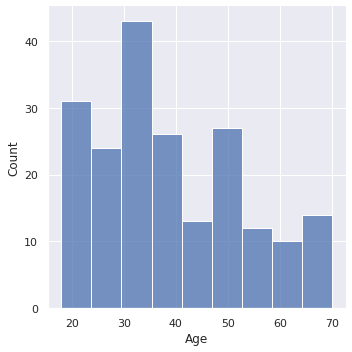

In [ ]:
sns.displot(df['Age']);

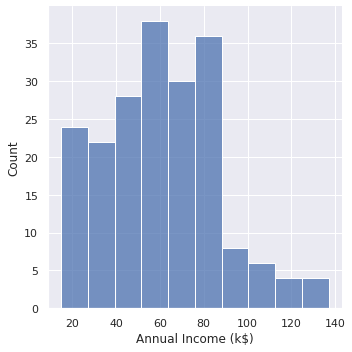

In [ ]:
#renda anual 

sns.displot(df['Annual Income (k$)']);

In [ ]:
df.describe().round(1)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.0,200.0,200.0,200.0
mean,100.5,38.8,60.6,50.2
std,57.9,14.0,26.3,25.8
min,1.0,18.0,15.0,1.0
25%,50.8,28.8,41.5,34.8
50%,100.5,36.0,61.5,50.0
75%,150.2,49.0,78.0,73.0
max,200.0,70.0,137.0,99.0


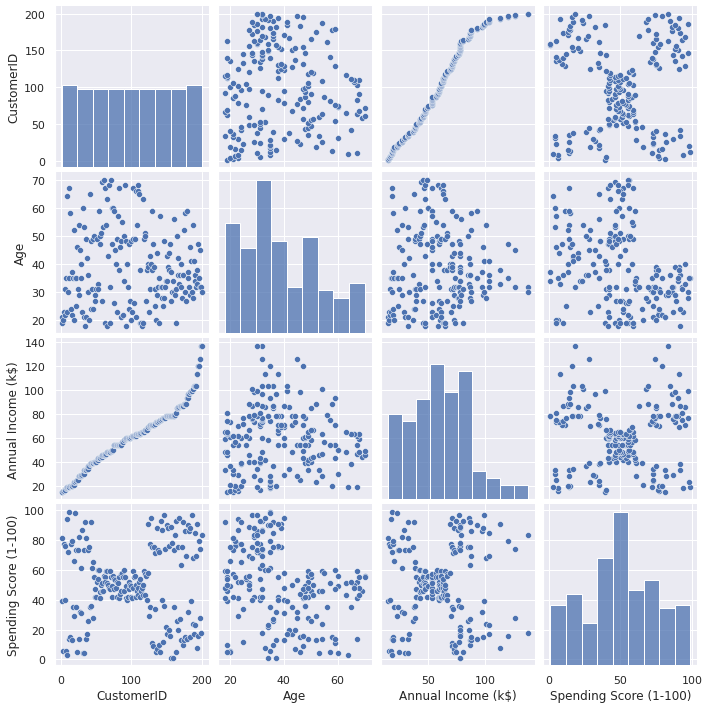

In [ ]:
sns.pairplot(df);

Etapa 2: pré-processar os dados e entender um pouco mais
Esta etapa normalmente leva mais tempo no ciclo, mas para nossos propósitos, a maioria dos conjuntos de dados escolhidos nesta série são limpos.

Os conjuntos de dados do mundo real são barulhentos e incompletos. As escolhas que fazemos nesta etapa para resolver problemas de dados podem afetar as etapas de recebimento de dados e o próprio resultado. Por exemplo, pode ser complicado lidar com dados ausentes quando não sabemos por que eles estão ausentes. Está faltando completamente ao acaso ou não? Também pode ser complicado abordar valores discrepantes se não compreendermos o domínio e o contexto do problema o suficiente

TRATAR OS DADOS 

In [ ]:
#Renomear as colunas

df  = df.rename(columns={'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Spending'})

df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Transformar a categoria em numerico , transformar o Gender em números.

le = LabelEncoder()
le.fit(df['Gender'].drop_duplicates())

df['Gender'] = le.transform(df['Gender'])


In [ ]:
#Vconferir a modificação do Gender

df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [ ]:
#EXCLUIR A COLUNA ID

X = df.drop('CustomerID', axis=1)
X.head()

,Gender,Age,Income,Spending
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Etapa 3: Modelar e avaliar Precisamos criar vários modelos com diferentes valores de k, medir o desempenho de cada modelo e usar k com o melhor desempenho em nosso modelo final.

Onde a verdade básica está disponível, comparamos os agrupamentos gerados aos da verdade básica.


A inércia não é uma métrica normalizada: apenas sabemos que valores mais baixos são melhores e zero é o ideal. 

A primeira etapa escolhe os centróides iniciais, com o método mais básico sendo escolher amostras do conjunto de dados . Após a inicialização, o K-means consiste em fazer um loop entre as duas outras etapas. A primeira etapa atribui cada amostra ao seu centróide mais próximo. A segunda etapa cria novos centróides tomando o valor médio de todas as amostras atribuídas a cada centróide anterior. A diferença entre o antigo e o novo centróide é calculada e o algoritmo repete essas duas últimas etapas até que esse valor seja menor que um limite. Em outras palavras, ele se repete até que os centróides não se movam significativamente.

KNN



In [ ]:
#Build and Fit Models

wcss_scores = []
iterations = list(range(1,10))

for k in iterations:
  model = KMeans(n_clusters=k)
  model.fit(X)
  wcss_scores.append(model.inertia_)


#Funciona da seguinte maneira, o valo vai ser gerado no SCORs model.inertia os valores 0 e 1
#serão armazenado na lista wcss_scores


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


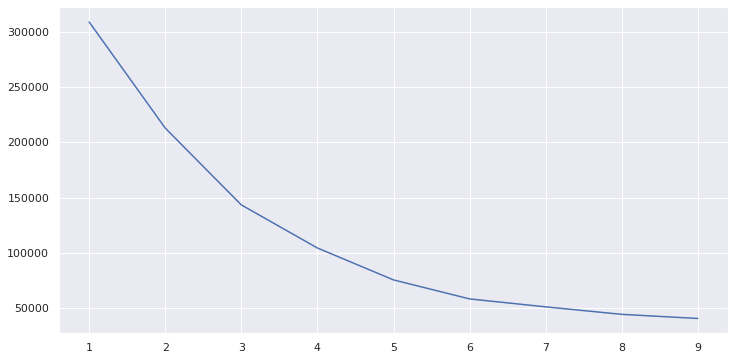

In [ ]:
#GERAR UM GRAFICO 

plt.figure(figsize=(12,6))
sns.lineplot(iterations, wcss_scores)
plt.show();

Existem quedas em 2, 3, 4 e 5. Vamos plotar alguns recursos e ver o que está acontecendo.

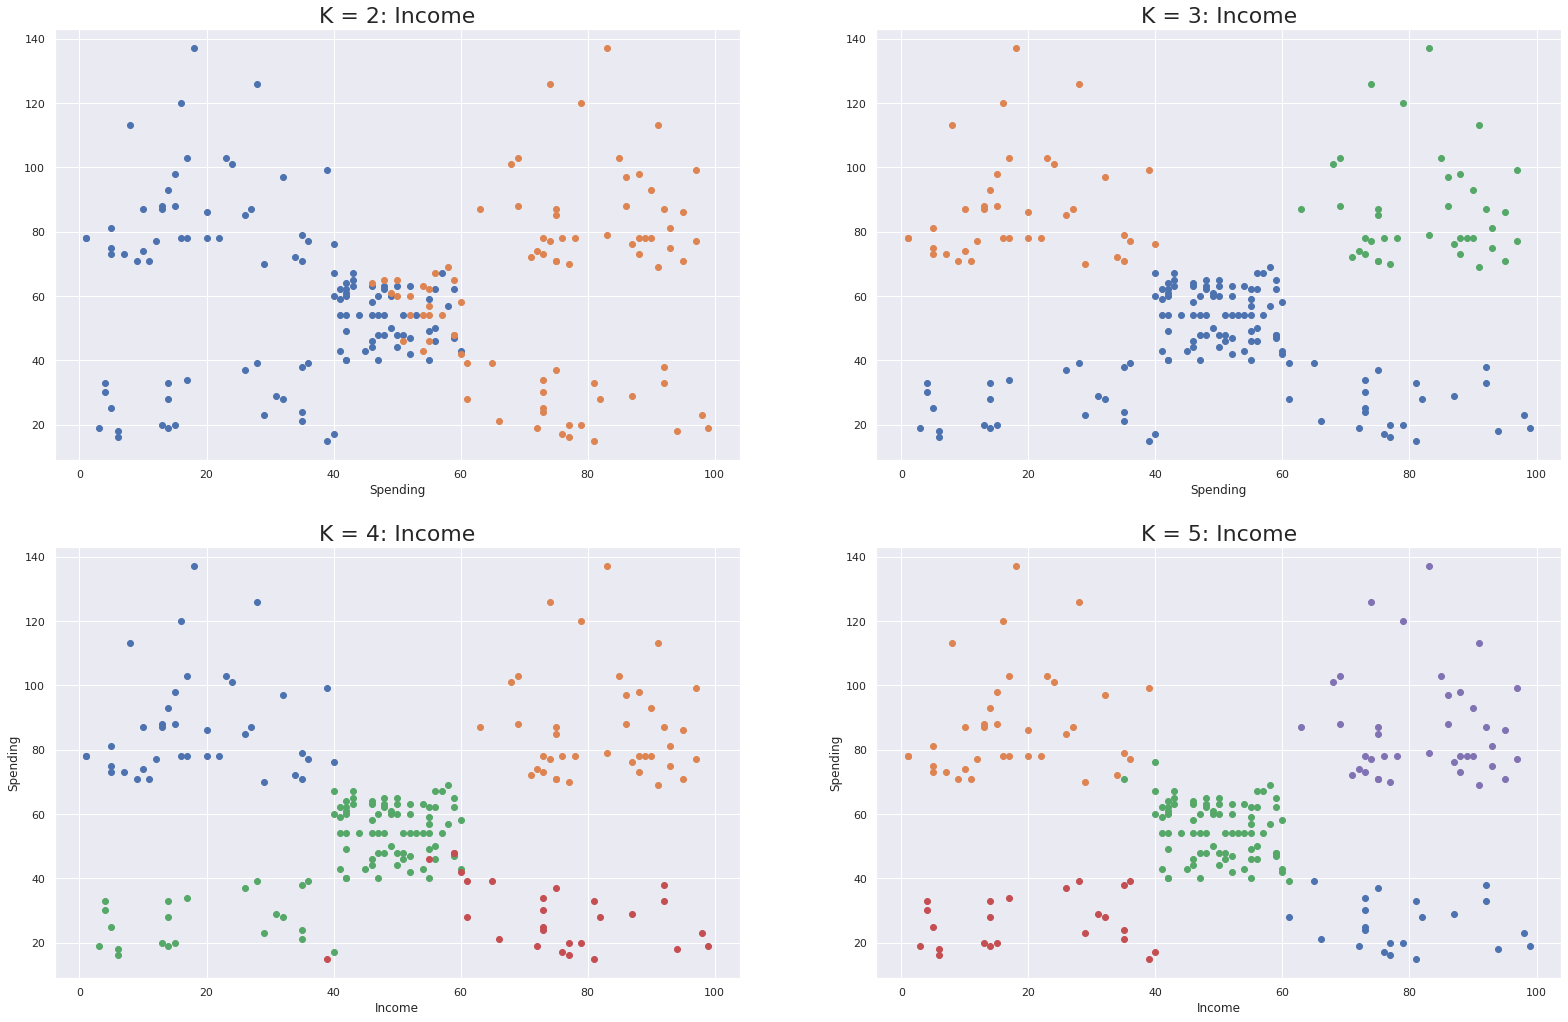

In [ ]:
# Visualize os clusters, considerando Renda e Gastos
plt.figure(figsize=(27,27))

plt.subplot(3,2,1)
plt.title('K = 2: Income',fontsize=22)
plt.xlabel('Income')
plt.xlabel('Spending')
model = KMeans(n_clusters=2)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Income[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Income[X.labels == 1])

plt.subplot(3,2,2)
plt.title('K = 3: Income',fontsize=22)
plt.xlabel('Income')
plt.xlabel('Spending')
model = KMeans(n_clusters=3)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Income[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Income[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Income[X.labels == 2])

plt.subplot(3, 2, 3)
plt.title('K = 4: Income', fontsize=22)
plt.xlabel('Income')
plt.ylabel('Spending')
model = KMeans(n_clusters=4)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Income[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Income[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Income[X.labels == 2])
plt.scatter(X.Spending[X.labels == 3], X.Income[X.labels == 3])

plt.subplot(3, 2, 4)
plt.title('K = 5: Income', fontsize=22)
plt.xlabel('Income')
plt.ylabel('Spending')
model = KMeans(n_clusters=5)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Income[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Income[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Income[X.labels == 2])
plt.scatter(X.Spending[X.labels == 3], X.Income[X.labels == 3])
plt.scatter(X.Spending[X.labels == 4], X.Income[X.labels == 4])

K = 5 é curioso, pois podemos ver facilmente cinco agrupamentos nesses gráficos. Vamos dar uma olhada mais de perto em k = 5.

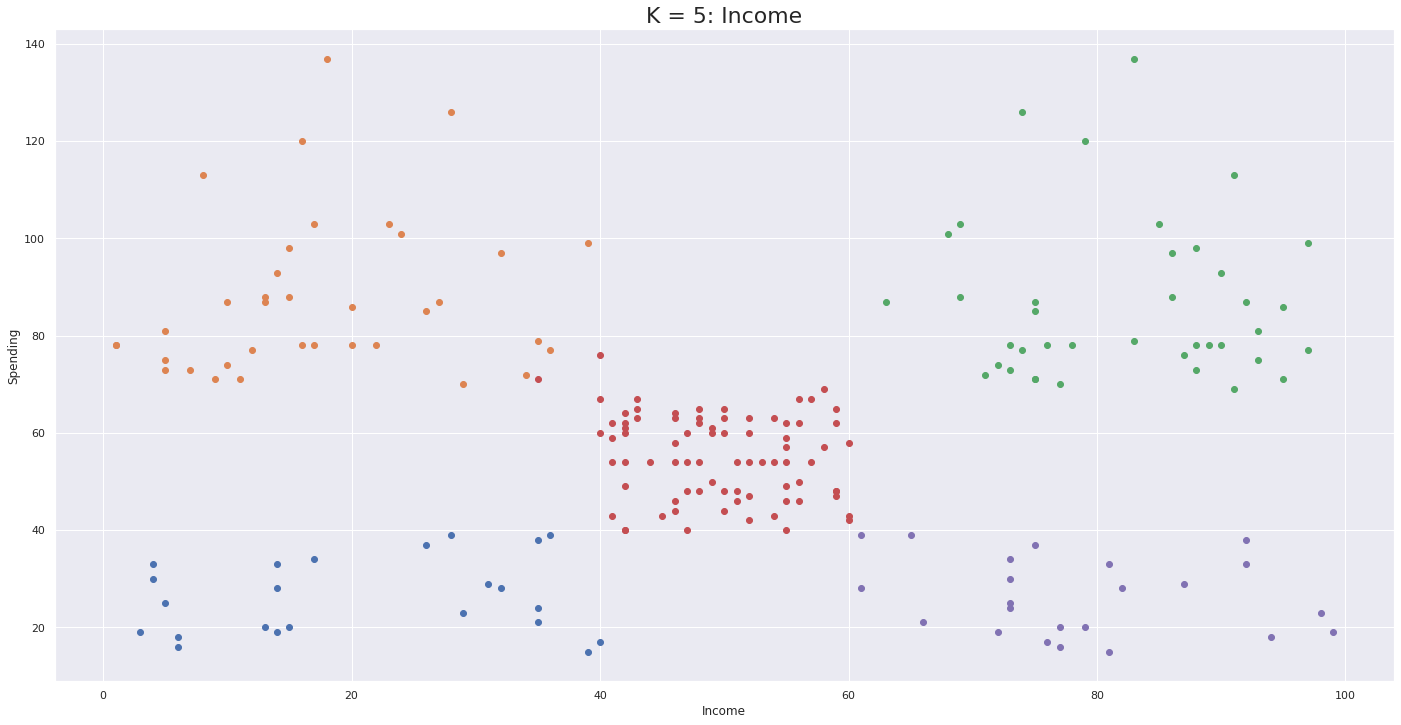

In [ ]:
# Visualise most interesting clusters
plt.figure(figsize=(24,12))

plt.title('K = 5: Income', fontsize=22)
plt.xlabel('Income')
plt.ylabel('Spending')
model = KMeans(n_clusters=5)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Income[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Income[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Income[X.labels == 2])
plt.scatter(X.Spending[X.labels == 3], X.Income[X.labels == 3])
plt.scatter(X.Spending[X.labels == 4], X.Income[X.labels == 4])

Acontece que existem cinco grupos interessantes com base na renda anual de um cliente e na pontuação de gastos.

Pessoas de baixa renda e baixos gastos. O primeiro cluster é formado por clientes de baixa renda e baixos gastos.

Pessoas de baixa renda e grandes gastadores. O segundo cluster é formado por clientes de baixa renda e altos gastos.

Renda média, gastadores médios. O terceiro cluster é formado por clientes com renda média e gastos médios.

Pessoas de alta renda e baixos gastos. O quarto cluster é formado por clientes de alta renda e baixos gastos.

Pessoas de alta renda e grandes gastadores. O quinto cluster é formado por clientes com alta renda e altos gastos.

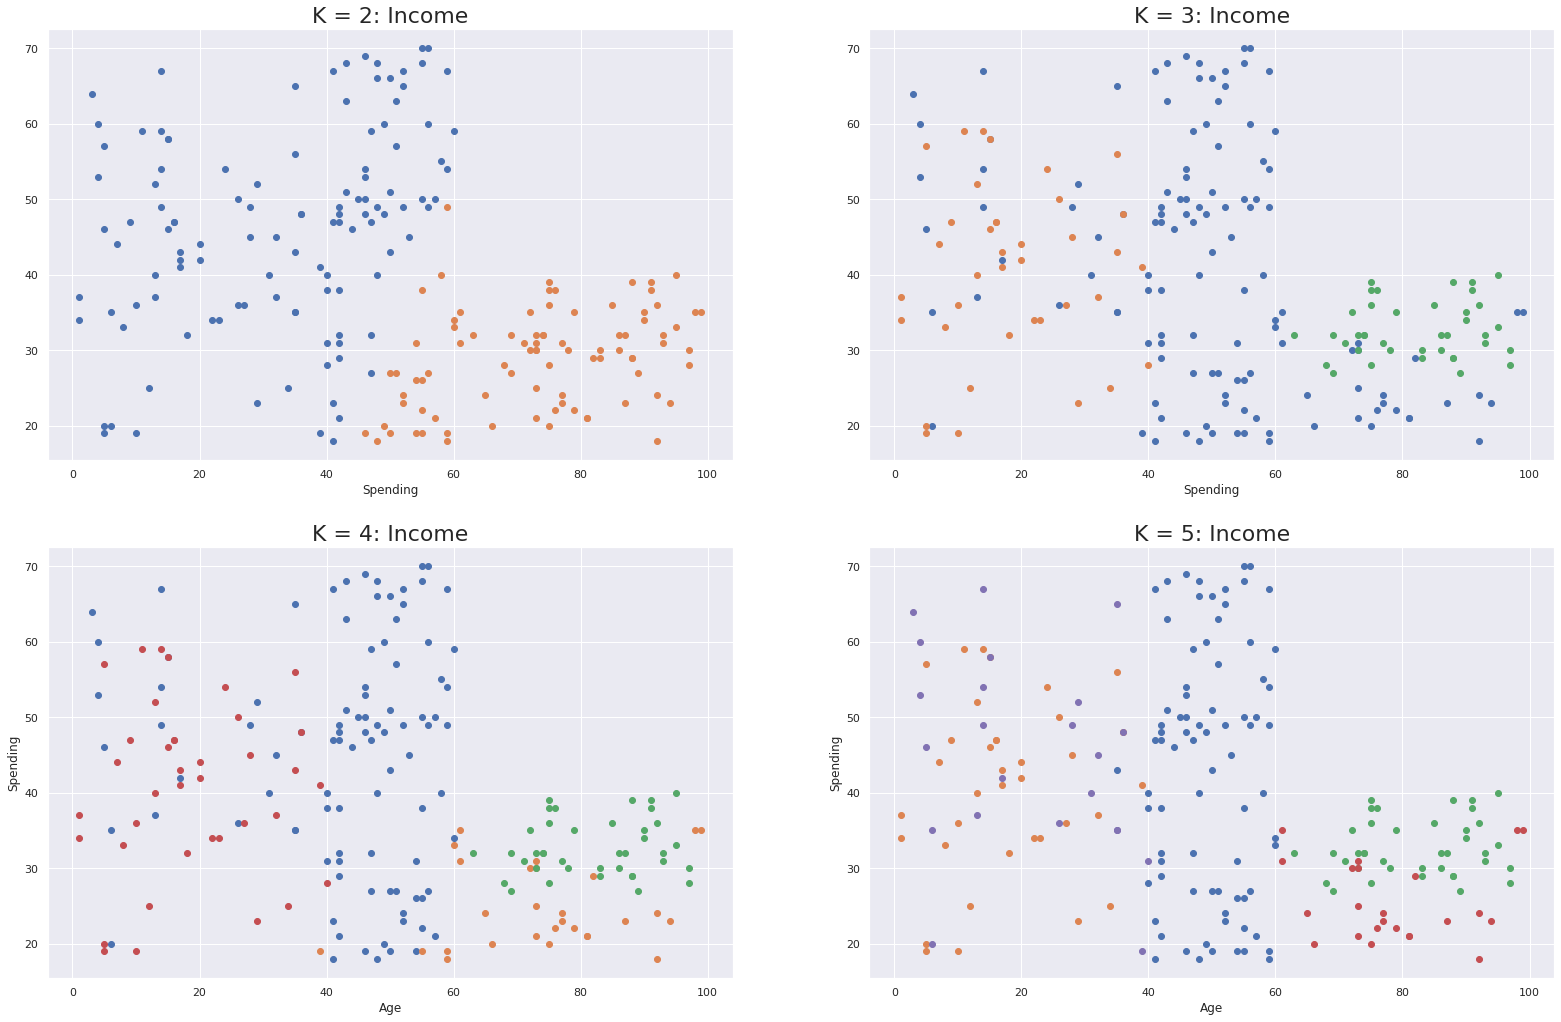

In [ ]:
# 
#Visualize os clusters, considerando Idade e Gastos
plt.figure(figsize=(27,27))

plt.subplot(3,2,1)
plt.title('K = 2: Income',fontsize=22)
plt.xlabel('Age')
plt.xlabel('Spending')
model = KMeans(n_clusters=2)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Age[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Age[X.labels == 1])

plt.subplot(3,2,2)
plt.title('K = 3: Income',fontsize=22)
plt.xlabel('Age')
plt.xlabel('Spending')
model = KMeans(n_clusters=3)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Age[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Age[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Age[X.labels == 2])

plt.subplot(3, 2, 3)
plt.title('K = 4: Income', fontsize=22)
plt.xlabel('Age')
plt.ylabel('Spending')
model = KMeans(n_clusters=4)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Age[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Age[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Age[X.labels == 2])
plt.scatter(X.Spending[X.labels == 3], X.Age[X.labels == 3])

plt.subplot(3, 2, 4)
plt.title('K = 5: Income', fontsize=22)
plt.xlabel('Age')
plt.ylabel('Spending')
model = KMeans(n_clusters=5)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Age[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Age[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Age[X.labels == 2])
plt.scatter(X.Spending[X.labels == 3], X.Age[X.labels == 3])
plt.scatter(X.Spending[X.labels == 4], X.Age[X.labels == 4])

K = 2 é curioso, pois podemos ver de alguma forma 2 agrupamentos nesses gráficos. Vamos dar uma olhada mais de perto em k = 2.

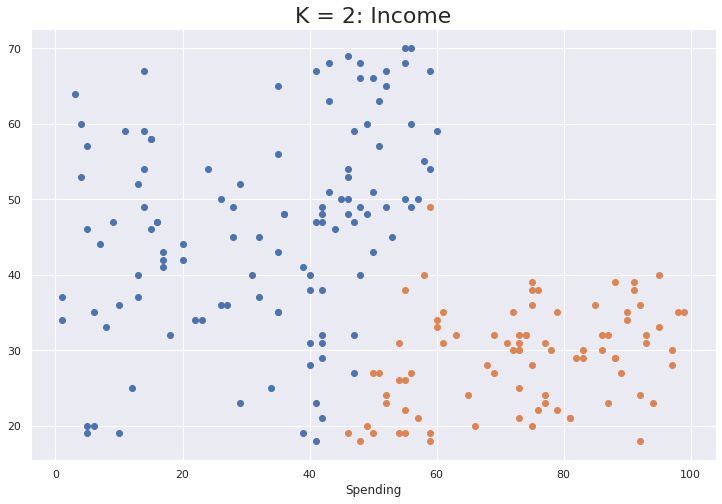

In [ ]:
# Visualize clusters interessantes
plt.figure(figsize=(27,27))

plt.subplot(3,2,1)
plt.title('K = 2: Income',fontsize=22)
plt.xlabel('Age')
plt.xlabel('Spending')
model = KMeans(n_clusters=2)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Age[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Age[X.labels == 1])

Acontece que existem dois grupos interessantes com base na idade de um cliente e na pontuação de gastos.

Gastadores jovens e de meia-idade. Um cluster é composto de clientes jovens a de meia idade que gastam muito.

Gastadores jovens e de meia-idade. O outro cluster é composto por todos os outros clientes com gastos baixos a médios.

Os gastadores de jovens a meia-idade podem representar um grande grupo demográfico a ser atingido.